# AutoMobile Dataset Clustering Analysis

Clustering bertujuan untuk mengelompokkan merk mobil berdasarkan ukuran mobil, dilihat dari atribut length, width, height.

## Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Import & Prepare data for clustering

In [2]:
df_losses = pd.read_csv('automobile-losses.csv')
df_risk = pd.read_csv('automobile-risk.csv')
df_spec = pd.read_csv('automobile-spec.csv')

df_spec.shape, df_losses.shape, df_risk.shape

((205, 25), (205, 2), (205, 2))

In [3]:
df_merge = pd.merge(df_spec, df_losses, how='left', on='ID')
df_merge = pd.merge(df_merge, df_risk, how='left', on='ID')
df_merge.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,normalized-losses,symboling
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,NaN,3
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,NaN,3
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,NaN,1
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,164.0,2
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,164.0,2


In [4]:
df_merge.isnull().sum()

ID                    0
make                  0
fuel-type             0
aspiration            0
num-of-doors          1
body-style            0
drive-wheel           0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
normalized-losses    41
symboling             0
dtype: int64

In [5]:
# karena berisi kategorikal, maka diisi oleh modus
df_merge['num-of-doors'] = df_merge['num-of-doors'].fillna(df_merge['num-of-doors'].mode().values[0])
# numerikal diganti dengan mean
df_merge['bore'] = df_merge['bore'].fillna(df_merge['bore'].mean())
df_merge['stroke'] = df_merge['stroke'].fillna(df_merge['stroke'].mean())
df_merge['horsepower'] = df_merge['horsepower'].fillna(df_merge['horsepower'].mode().values[0])
df_merge['peak-rpm'] = df_merge['peak-rpm'].fillna(df_merge['peak-rpm'].mean())
df_merge['normalized-losses'] = df_merge['normalized-losses'].fillna(df_merge['normalized-losses'].mean())
df_merge['price'] = df_merge['price'].fillna(df_merge['price'].mean())
df_merge.isnull().sum()

ID                   0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
normalized-losses    0
symboling            0
dtype: int64

## Data visualization

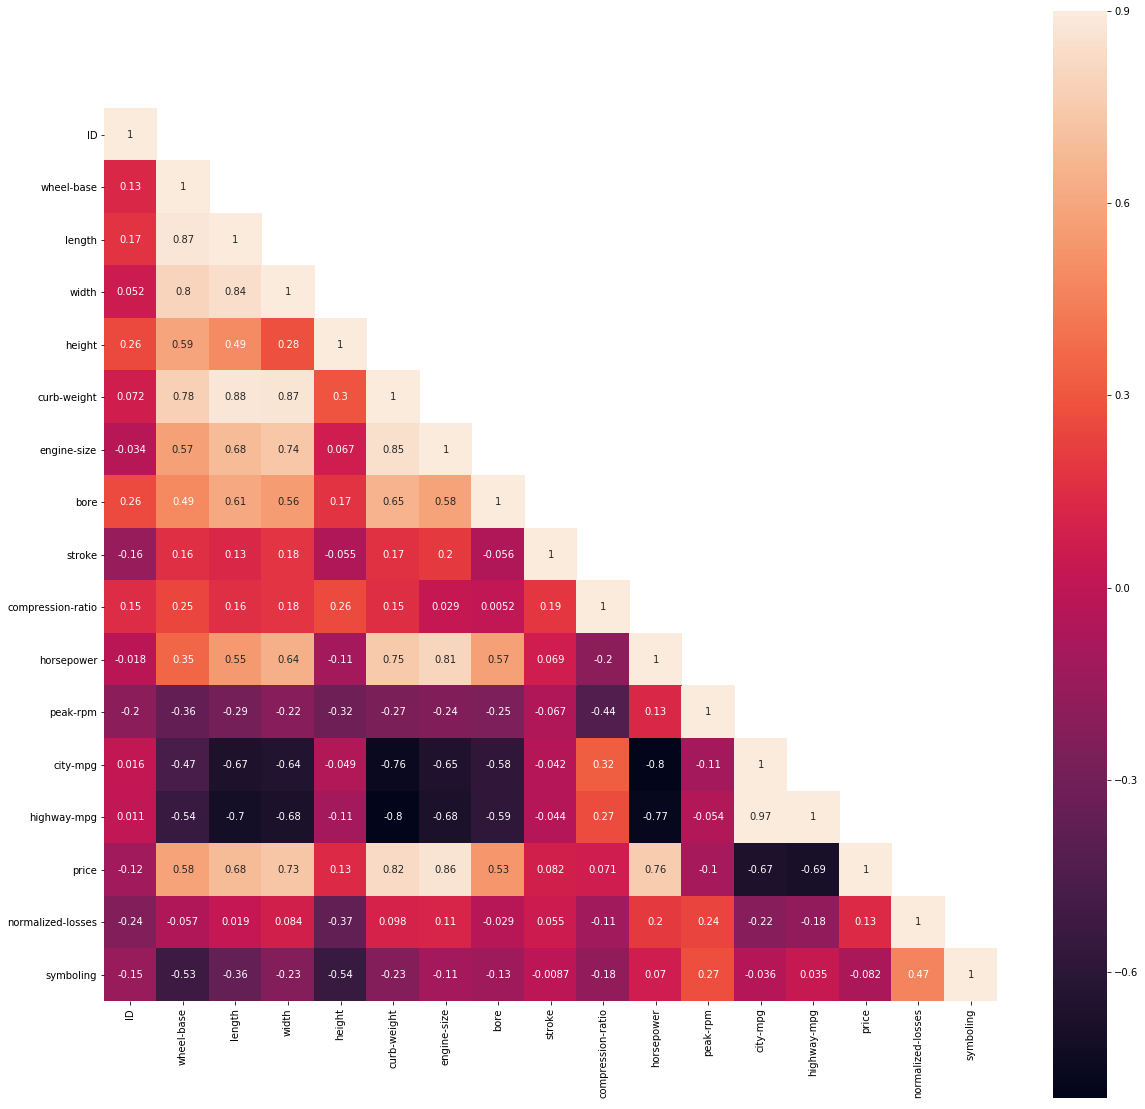

In [6]:
#create correlation with hitmap

#create correlation
corr = df_merge.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,20)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

In [8]:
df_size = df_merge.groupby(by='make').mean()[['length', 'width', 'height']]

Grafik persebaran ukuran mobil


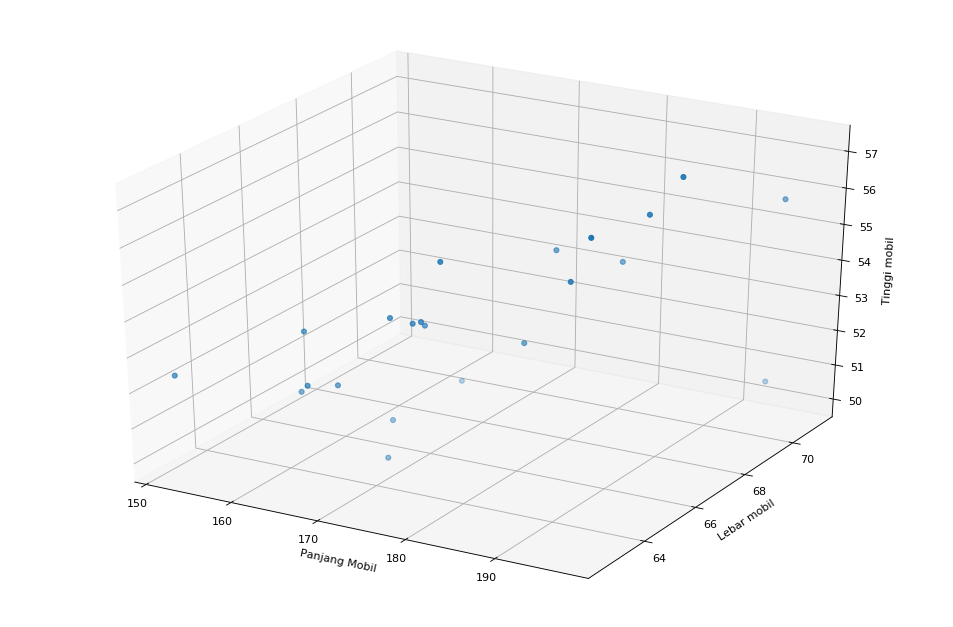

In [9]:
np_size = np.asarray(df_size)

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(np_size[:,0], np_size[:,1], np_size[:,2], cmap='rainbow')

xLabel = ax.set_xlabel('Panjang Mobil', linespacing=3.2)
yLabel = ax.set_ylabel('Lebar mobil', linespacing=3.1)
zLabel = ax.set_zlabel('Tinggi mobil', linespacing=3.4)
print("Grafik persebaran ukuran mobil")
plt.show()

## K-Means

1. Tahap pertama dari K-Means adalah dilakukan pencarian K menggunakan Elbow Method

In [10]:
from sklearn.cluster import KMeans

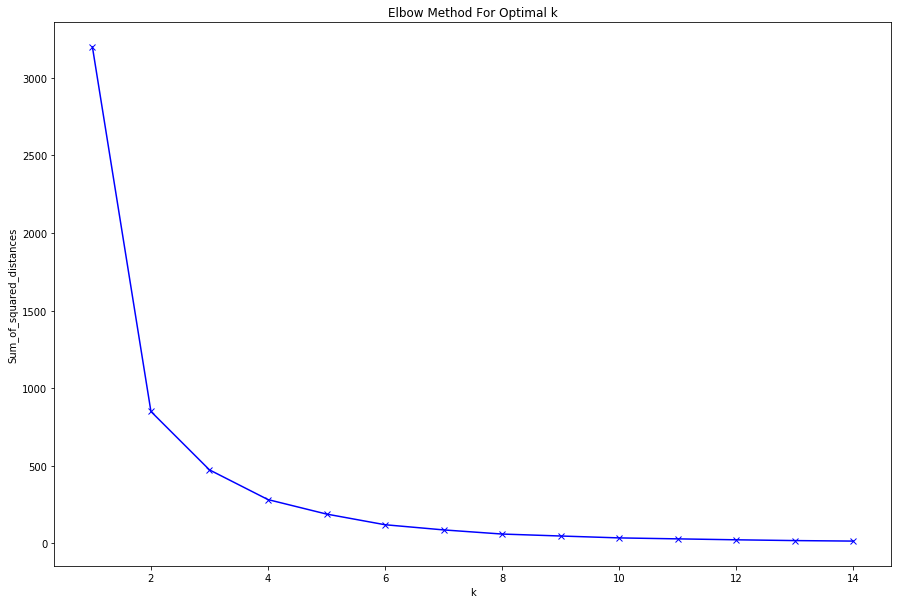

In [11]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(np_size)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(15,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

.2. Dari grafik diatas, disimpulkan K=3. Maka testing dilakukan menggunakan K=3 dibawah lalu menghasilkan data tersebut

In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(np_size)
kmeans.labels_

array([0, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 2],
      dtype=int32)

.3. Visualisasi hasil klasterisasi menggunakan K-Means

Grafik persebaran ukuran mobil


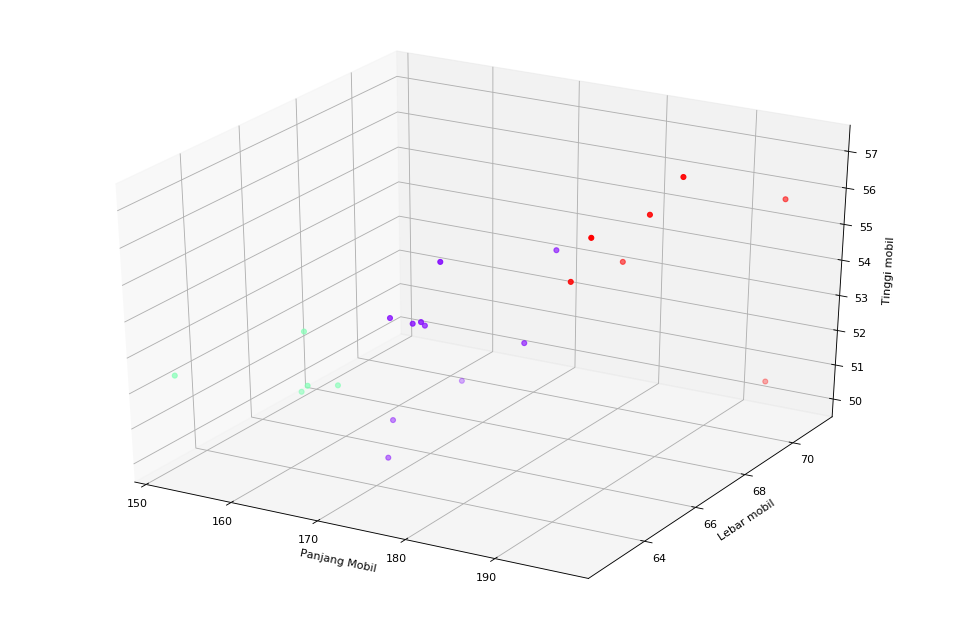

In [13]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(np_size[:,0], np_size[:,1], np_size[:,2], c=kmeans.labels_, cmap='rainbow')

xLabel = ax.set_xlabel('Panjang Mobil', linespacing=3.2)
yLabel = ax.set_ylabel('Lebar mobil', linespacing=3.1)
zLabel = ax.set_zlabel('Tinggi mobil', linespacing=3.4)
print("Grafik persebaran ukuran mobil")

In [26]:
df_kmeans = df_size
df_kmeans['Cluster'] = kmeans.labels_
df_kmeans

,length,width,height,Cluster
make,,,,
alfa-romero,169.600000,64.566667,50.000000,0
audi,183.828571,68.714286,54.428571,2
bmw,184.500000,66.475000,54.825000,2
chevrolet,151.933333,62.500000,52.400000,1
dodge,160.988889,64.166667,51.644444,1
honda,160.769231,64.384615,53.238462,1
isuzu,163.775000,63.550000,52.225000,1
jaguar,196.966667,69.933333,51.133333,2
mazda,170.805882,65.588235,53.358824,0


Dari klaster yang didapat,

0: Klaster yang berisi mobil berukuran kecil<br>
1: Klaster yang berisi mobil berukuran menengah<br>
2: Klaster yang berisi mobil berukuran besar

## Hierarchical

.1. Langkah pertama yang dilakukan adalah mengestimasi jumlah klaster dengan melihat struktur hirarki dari tabel yang didapat

In [15]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

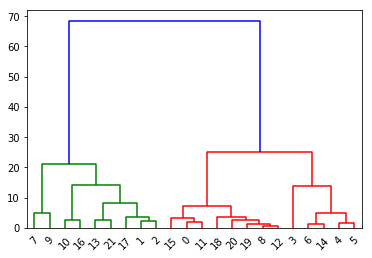

In [16]:
dendrogram = sch.dendrogram(sch.linkage(np_size, method='ward'))

.2. Setelah jumlah klaster didapat (4), maka dilakukan testing seperti dibawah ini

In [17]:
hierar = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hierar.fit(np_size)
hierar.labels_

array([2, 0, 0, 1, 1, 1, 1, 3, 2, 3, 0, 2, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0])

.3. Visualisasi hasil klasterisasi menggunakan hierarchical

Grafik persebaran ukuran mobil


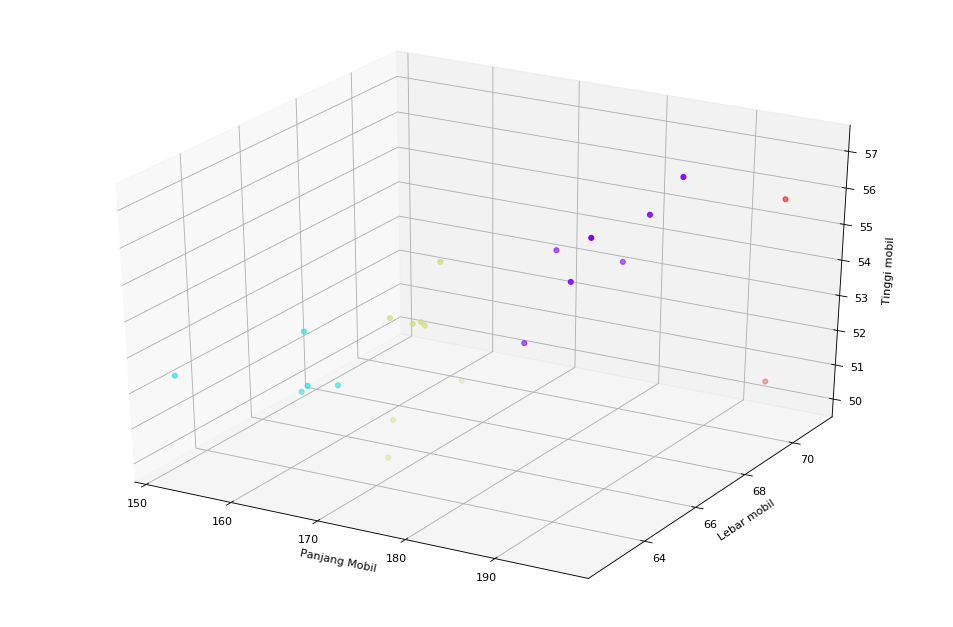

In [18]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(np_size[:,0], np_size[:,1], np_size[:,2], c=hierar.labels_, cmap='rainbow')

xLabel = ax.set_xlabel('Panjang Mobil', linespacing=3.2)
yLabel = ax.set_ylabel('Lebar mobil', linespacing=3.1)
zLabel = ax.set_zlabel('Tinggi mobil', linespacing=3.4)
print("Grafik persebaran ukuran mobil")

In [19]:
df_hierar = df_size
df_hierar['Cluster'] = hierar.labels_
df_hierar

,length,width,height,Cluster
make,,,,
alfa-romero,169.600000,64.566667,50.000000,2
audi,183.828571,68.714286,54.428571,0
bmw,184.500000,66.475000,54.825000,0
chevrolet,151.933333,62.500000,52.400000,1
dodge,160.988889,64.166667,51.644444,1
honda,160.769231,64.384615,53.238462,1
isuzu,163.775000,63.550000,52.225000,1
jaguar,196.966667,69.933333,51.133333,3
mazda,170.805882,65.588235,53.358824,2


Dari klaster yang didapat,

2: Klaster yang berisi mobil berukuran kecil<br>
1: Klaster yang berisi mobil berukuran menengah<br>
0: Klaster yang berisi mobil berukuran besar

## DBSCAN

.1. Langkah pertama dalam metode dbscan adalah estimasi eps dan min_samples secara manual. jika dirasa sudah sesuai maka oke

In [20]:
from sklearn.cluster import DBSCAN

In [28]:
dbscan = DBSCAN(eps=4, min_samples=2)
dbscan.fit(np_size)
dbscan.labels_

array([ 0,  1,  1, -1,  0,  0,  0, -1,  0, -1,  2,  0,  0,  1,  0,  0,  2,
        1,  0,  0,  0,  1])

.2. Skor yang didapat setelah mempertimbangkan jumlah klaster dari metode sebelumnya, maka didapat eps=4 dan min_samples=2, lalu dibawah adalah visualisasi dari hasil klasterisasi

Grafik persebaran ukuran mobil


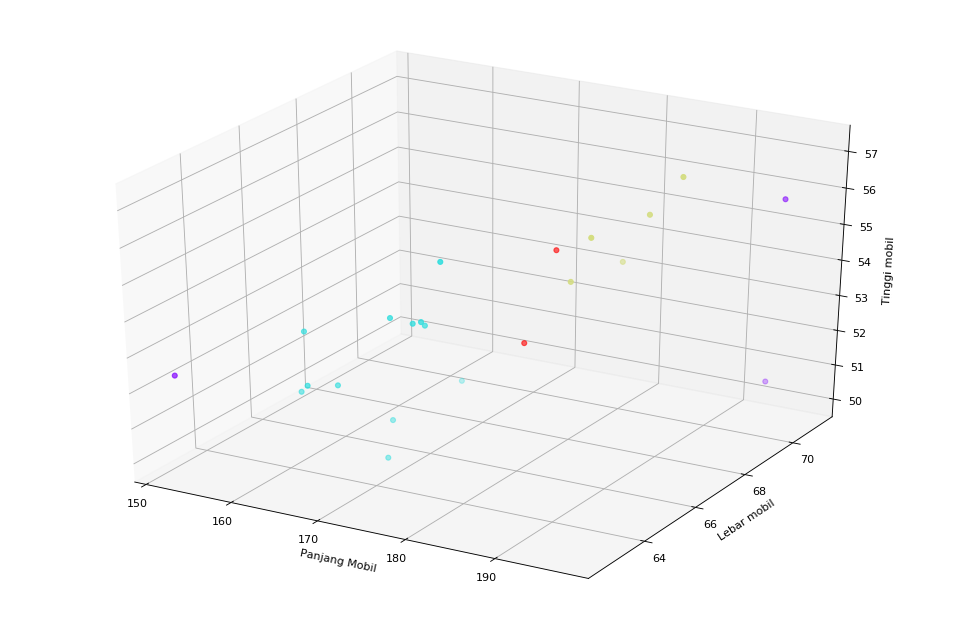

In [29]:
fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(np_size[:,0], np_size[:,1], np_size[:,2], c=dbscan.labels_, cmap='rainbow')

xLabel = ax.set_xlabel('Panjang Mobil', linespacing=3.2)
yLabel = ax.set_ylabel('Lebar mobil', linespacing=3.1)
zLabel = ax.set_zlabel('Tinggi mobil', linespacing=3.4)
print("Grafik persebaran ukuran mobil")

In [30]:
df_dbscan = df_size
df_dbscan['Cluster'] = dbscan.labels_
df_dbscan

,length,width,height,Cluster
make,,,,
alfa-romero,169.600000,64.566667,50.000000,0
audi,183.828571,68.714286,54.428571,1
bmw,184.500000,66.475000,54.825000,1
chevrolet,151.933333,62.500000,52.400000,-1
dodge,160.988889,64.166667,51.644444,0
honda,160.769231,64.384615,53.238462,0
isuzu,163.775000,63.550000,52.225000,0
jaguar,196.966667,69.933333,51.133333,-1
mazda,170.805882,65.588235,53.358824,0


Dari klaster yang didapat,

0: Klaster yang berisi mobil berukuran kecil<br>
1: Klaster yang berisi mobil berukuran menengah<br>
2: Klaster yang berisi mobil berukuran besar<br>
-1: Outlier<br>